# Fancy Word Cloud

**Word clouds** (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Luckily, a Python package already exists in Python for generating **word clouds**. The package, called `word_cloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).

In this notebook, we will create stylish, high-quality word clouds for a given text document using `word_cloud` package.

First, let's install all packages we need.

In [127]:
import numpy as np 
import pandas as pd
from scipy.ndimage import gaussian_gradient_magnitude

from PIL import Image

import matplotlib as mpl
import matplotlib.pyplot as plt

#sets the backend of matplotlib to the inline backend
%matplotlib inline 

In [133]:
# install wordcloud
!pip3 install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [77]:
# open the text file and read it
f = open('data/text/detective-conan-the-jet-black-mystery-train.txt', 'r')
conan_text = f.read()

Next, let's use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords. If necessary, we can *define our own stopwords dictionary* to make it align with the text we will read.

In [79]:
stopwords = set(STOPWORDS)

### 1. Basic Word Clouds

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the text.

In [104]:
# instantiate a word cloud object
conan = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
conan.generate(conan_text)

Awesome! Now that the **word cloud** is created, let's visualize it.

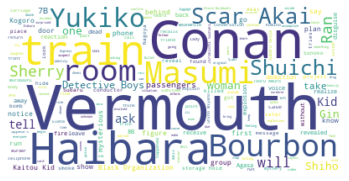

In [101]:
# display the word cloud
plt.imshow(conan, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the text, the most common words are **Vermouth**, **Haibara**, **Conan**, **Bourbon**, and so on. For DC fans, you will know this case specifically, right?

Let's resize the cloud so that we can see the less frequent words a little better.

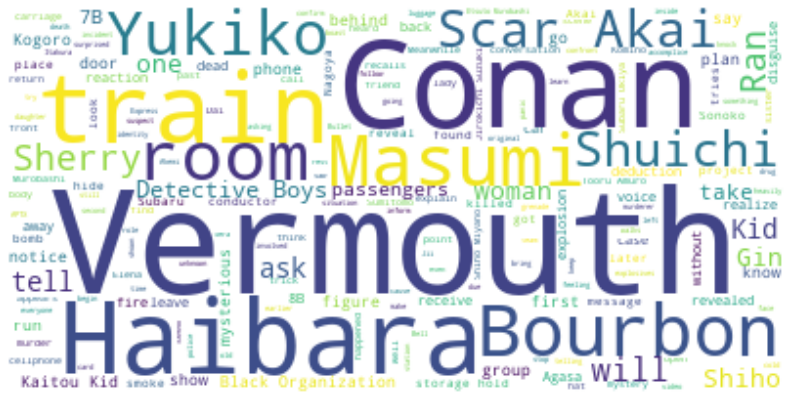

In [102]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(conan, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! Let's now try to change the background color of the work clouds.

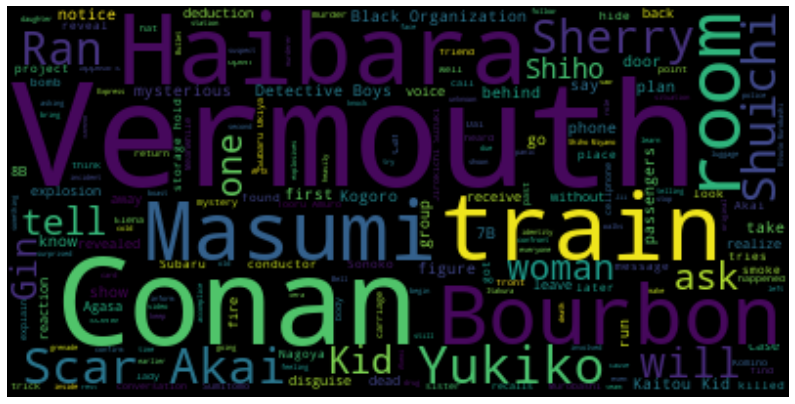

In [103]:
# instantiate a word cloud object
conan = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
conan.generate(conan_text)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(conan, interpolation='bilinear')
plt.axis('off')
plt.show()

It's interesting, right? Now let's try to change the color of the fonts. We can do this by setting the colormap parameter in `WordCloud()` function. You also can refer this [link](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html) documentation to see color palette in Matplotlib.

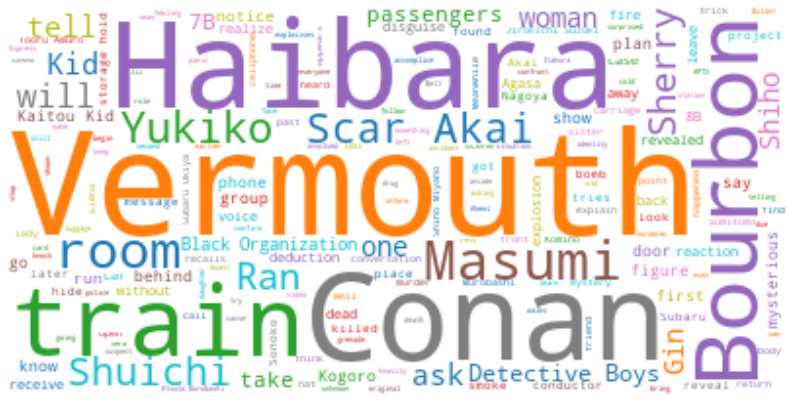

In [111]:
# instantiate a word cloud object
conan = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    colormap='tab10'
)

# generate the word cloud
conan.generate(conan_text)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(conan, interpolation='bilinear')
plt.axis('off')
plt.show()

Last one, let's try other font to make it more awesome! You can use many free font out there, especially Google Font!

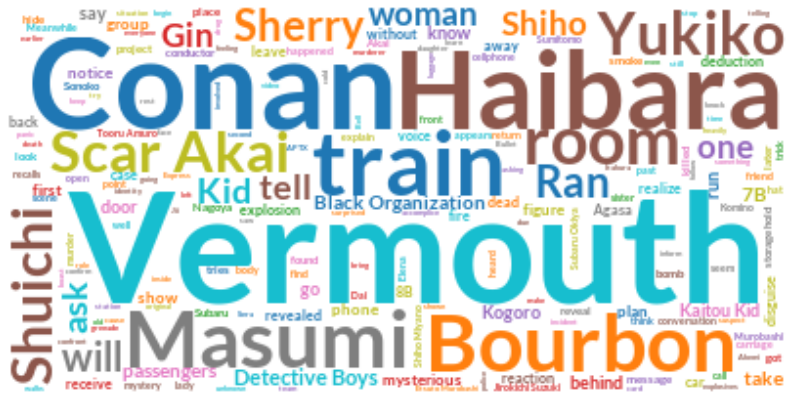

In [114]:
# instantiate a word cloud object
conan = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    colormap='tab10',
    font_path='data/font/Lato-Bold.ttf'
)

# generate the word cloud
conan.generate(conan_text)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(conan, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! 

### 2. Mask Word Cloud

Another cool thing we can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of Conan then. The mask usually use **.png** format.

Let's go ahead and open the file then.

In [116]:
# save mask to conan_mask
conan_mask = np.array(Image.open('data/mask/conan.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


Let's take a look at how the mask looks like.

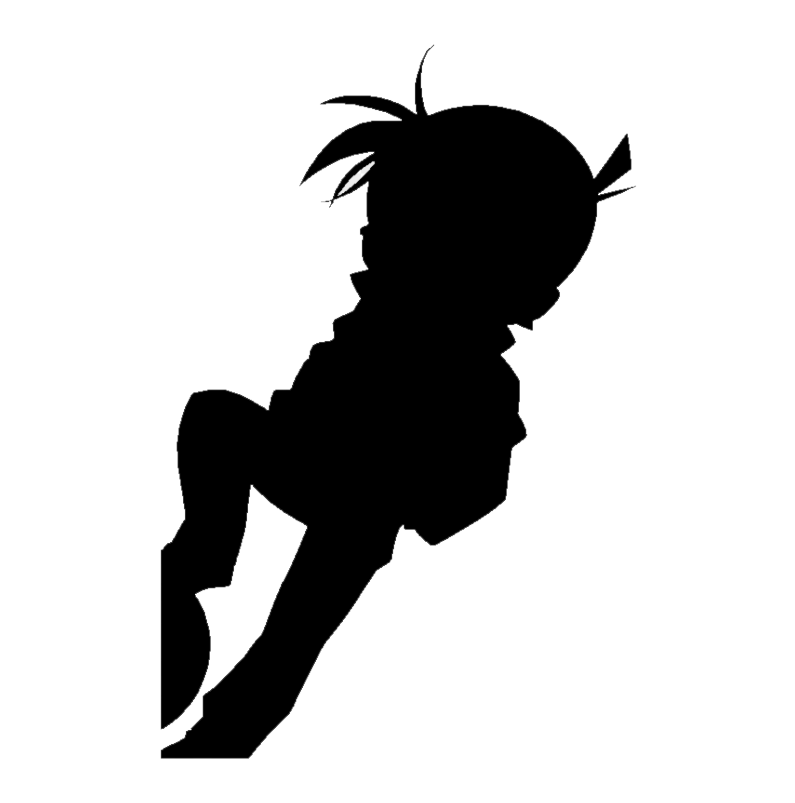

In [117]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(conan_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word cloud` according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the text.

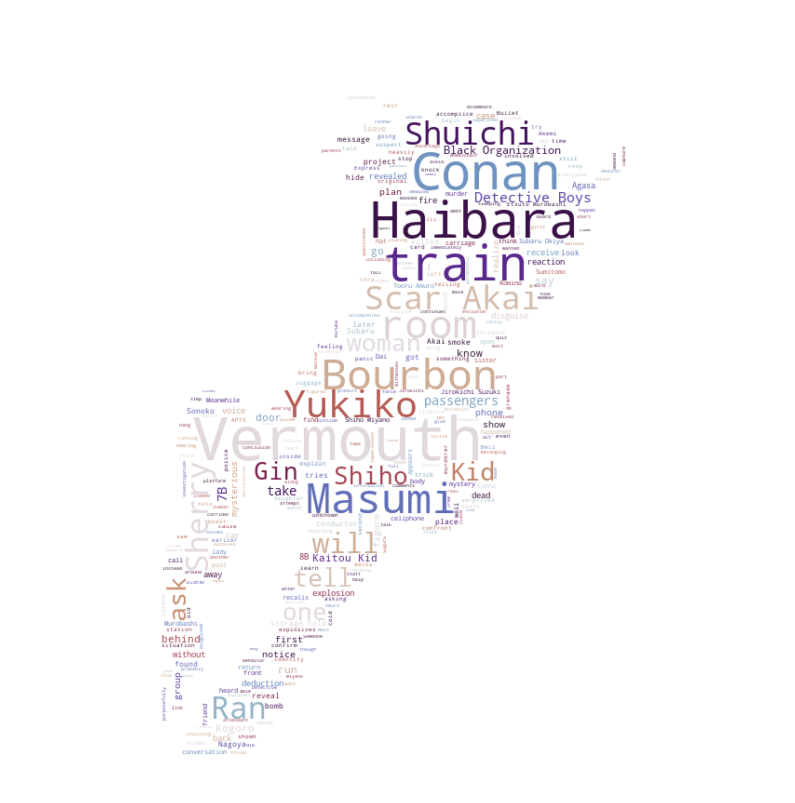

In [118]:
# instantiate a word cloud object
conan_wc = WordCloud(background_color='white', max_words=2000, mask=conan_mask, stopwords=stopwords, colormap='twilight')

# generate the word cloud
conan_wc.generate(conan_text)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(conan_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Really impressive!

### 3. Image-colored Word Cloud with Boundary Map

In addition to the mask, Python `word_cloud` allows the user to use the original colors of the image to set the colors of the words.

Let's load the file first and enforce between colors in the mask. 

In [128]:
# load image
conan_color = np.array(Image.open('data/picture/conan_run.jpg'))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
conan_color = conan_color[::3, ::3]

# create mask  white is "masked out"
conan_color_mask = conan_color.copy()
conan_color_mask[conan_color_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# for that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(conan_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
conan_color_mask[edges > .08] = 255

Let's create the word clouds then. A bit sluggish, you can subsample more strongly for quicker rendering relative_scaling=0 means the frequencies in the data are reflected less acurately but it makes a better picture.

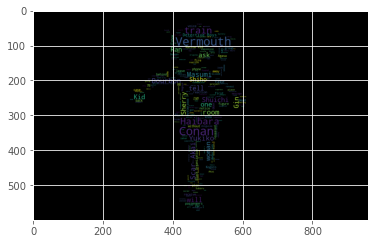

In [142]:
# create wordcloud
wc = WordCloud(max_words=5000, mask=conan_color_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(conan_text)
plt.imshow(wc)

This is how we get color of the word cloud based on the picture colors.

In [140]:
# create coloring from image
image_colors = ImageColorGenerator(conan_color)
wc.recolor(color_func=image_colors)

Now, let's show the word clouds then!

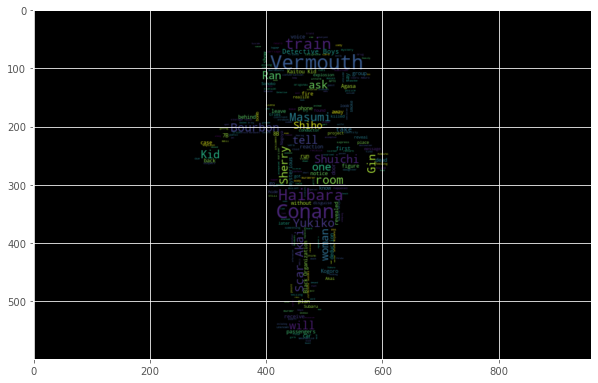

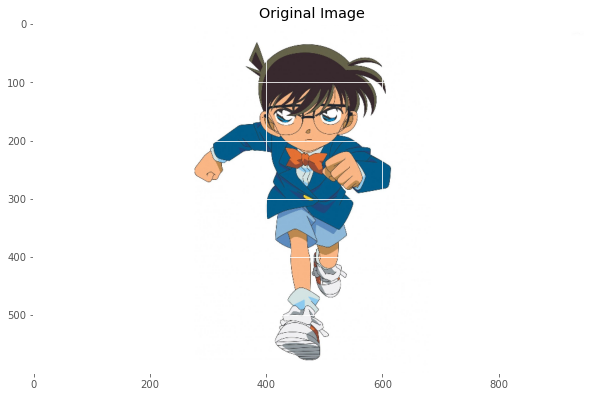

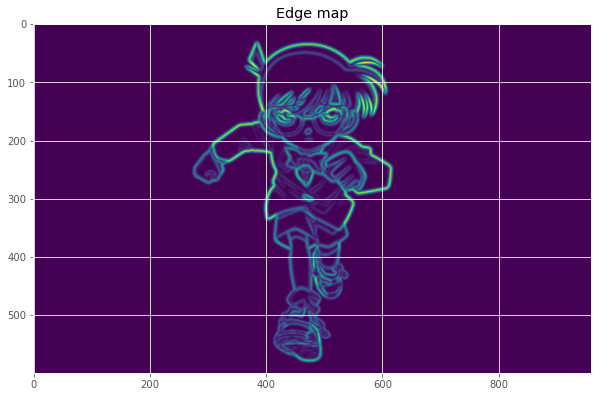

In [143]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(conan_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

Lastly, let's save the work clouds generated and use it for further purpose.

In [144]:
# save the word cloud generated to a file
wc.to_file("data/result/conan_new.png")